In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ["CUDA_VISIBLE_DEVICES"] = '1'

import pickle
import numpy as np

from os import listdir
from os.path import isfile, join

from scipy.stats import entropy
from scipy.special import softmax
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from helper import *

from matplotlib import mlab
import matplotlib.pyplot as plt

/home/tryan/miniconda2/envs/py37/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
#base batch_size=500
time_inference = {
    'resnet_18' : 0.043308353,
    'resnet_34' : 0.063735914,
    'resnet_50' : 0.114385653,
    'resnet_101' : 0.183127236,
    'nasnet_mobile' : 0.8923602104187012,
    'nasnet_large' : 5.196358609199524*2,
    'pnasnet_mobile' : 0.8181339502334595,
    'pnasnet_large' : 4.892335391044616*2,    
    
}
time_inference_cpu = {
    'resnet_18' : 1.012381005,
    'resnet_34' : 1.728078532,
    'resnet_50' : 2.145581436,
    'resnet_101' : 3.449709797,
    'nasnet_mobile' : 0.,
    'nasnet_large' : 0.,
    'pnasnet_mobile' : 0.,
    'pnasnet_large' : 0.,    
}

#base batch_size=1
# time_inference = {
#     'resnet_18' : 0.004326963,
#     'resnet_34' : 0.007118535,
#     'resnet_50' : 0.01020844,
#     'resnet_101' : 0.01618433,    
# }
# time_inference_cpu = {
#     'resnet_18' : 0.035453391,
#     'resnet_34' : 0.05855341,
#     'resnet_50' : 0.074465179,
#     'resnet_101' : 0.114496183,
# }

In [3]:
resnets = [18, 34, 50, 101]
logits = {}
accuracy_dict = {}

for i in resnets :
    net = 'resnet_' + str(i)
    l, acc = load_logit_acc(net, 'pred_'+str(i))
    print(net, np.mean(acc))
    logits[net] = l
    accuracy_dict[net] = acc

resnet_18 0.6972
resnet_34 0.72984
resnet_50 0.75826
resnet_101 0.77266


In [4]:
def evaluate(net1, net2, gpu=True) :
    logits1 = logits[net1]
    softmax_val = softmax(logits1, axis=1)
    entropy_val = np.array([entropy(x) for x in softmax_val])
    
    accuracy1 = accuracy_dict[net1]
    accuracy2 = accuracy_dict[net2]
    
    y_true = (accuracy1 == 0) & (accuracy2 == 1)
    auc = roc_auc_score(y_true, entropy_val)
    show_auc(y_true, entropy_val)

    print(net1, np.mean(accuracy1), '+', net2, np.mean(accuracy2))
    print('AUC entropy', auc)   
    
    return all_threshold, all_accuracy, all_speedup, passed_rate, val_01, val_10

In [ ]:
if gpu :
    time_small = time_inference[net1]
    time_large = time_inference[net2]
else :
    time_small = time_inference_cpu[net1]
    time_large = time_inference_cpu[net2]



In [ ]:
t, a, p, v01, v10 = calculate_speedup(entropy_val, accuracy1, accuracy2)

    show(all_threshold, all_accuracy, all_speedup, val_01, val_10)

In [ ]:
speed = time_large/(large_count*(time_large+time_small)+small_count*time_small)
speed2 = (large_count*(time_large+time_small)+small_count*time_small)/time_large
speedup.append(speed)

resnet_18 0.6972 + resnet_101 0.77266
AUC entropy 0.7976738623525482


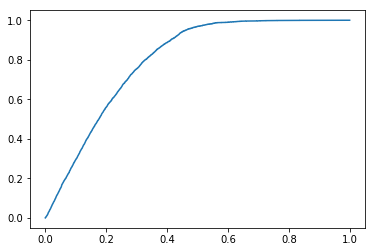

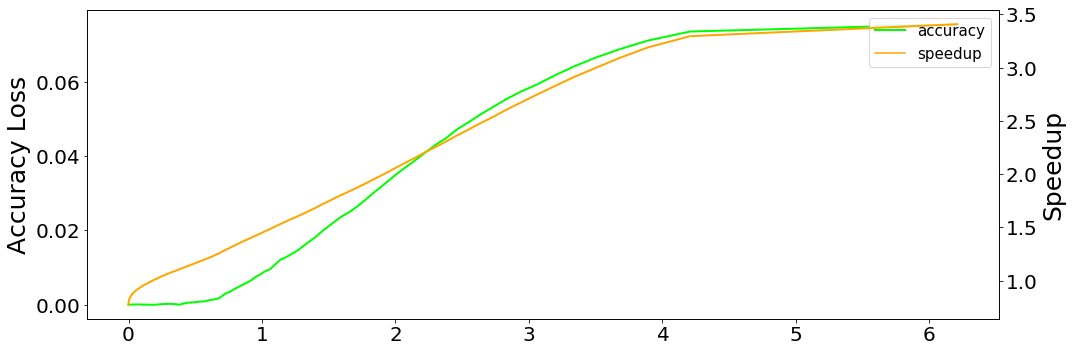

In [5]:
t, a, s, p, v01, v10 = evaluate('resnet_18', 'resnet_101', gpu=False)

In [6]:
stayed = np.argmax(s[a<=0.0209])
print(stayed/len(s), s[stayed], a[stayed])

0.71916 1.7412852216553039 0.02088000000000001


In [7]:
x = 0.9
idx = p>=x

In [8]:
a[idx][-1]

0.0

In [9]:
s[idx][-1]

0.8378939515714274

In [10]:
p[idx][-1]

0.9

In [11]:
v01[idx][-1]

0.11304

In [12]:
v10[idx][-1]

0.03758